In [56]:
import google.datalab.bigquery as bq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.io import gbq
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from scipy.cluster.hierarchy import dendrogram, linkage


In [144]:
import google.datalab.bigquery as bq
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

print(__doc__)
from time import time
from scipy import ndimage
from sklearn import manifold, datasets

Automatically created module for IPython interactive environment


<h1>Students entries August 2018, November 2018, February 2019 </h1>

<h2>Read from Big Query</h2>

In [132]:
sql = """
    SELECT
     *
    FROM
    `big-data-analytics-2.agnesDataset.student_entry`
"""

In [133]:
df = bq.Query(sql).execute().result().to_dataframe()

In [ ]:
df

<h1>AGNES</h1>

In [135]:
X = np.array(df)
X

array([[ 2,  6,  1,  1],
       [ 2,  6,  2,  1],
       [ 2,  6,  2,  1],
       ...,
       [ 1, 38,  3,  4],
       [ 2, 38,  2,  4],
       [ 2, 41,  1,  4]])

In [136]:
n_clusters=5
#distance= 'euclidean'
distance= 'cosine'
linkage_method='complete'

=> linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

* ward minimizes the variance of the clusters being merged.
* average uses the average of the distances of each observation of the two sets.
* complete or maximum linkage uses the maximum distances between all observations of the two sets.
* single uses the minimum of the distances between all observations of the two sets.


=> n_clusters : The number of clusters to find.

=> affinity : Metric used to compute the linkage. 
Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’. 
If linkage is “ward”, only “euclidean” is accepted.

=> memory : cache the output of the computation of the tree.(Optional)

=> connectivity: connectivity matrix as kneighbors_graph, the hierarchical clustering algorithm is unstructured.(Optional)

=> compute_full_tree : bool or ‘auto’ (optional)
Stop early the construction of the tree at n_clusters. This is useful to decrease computation, useful only when specifying connectivity matrix and caching, it may be advantageous to compute the full tree.

pooling_func : callable, default=’deprecated’ Ignored.

In [137]:
AgglomerativeClustering(affinity=distance, compute_full_tree='auto',
            connectivity=None, linkage=linkage_method, memory=None, n_clusters=n_clusters,
            pooling_func='deprecated')

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func='deprecated')

<h2>Attributes</h2>

In [153]:
X = np.array(df)

In [154]:
clustering = AgglomerativeClustering().fit(X)

cluster labels for each point

In [151]:
y =clustering.labels_
y

array([2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 3, 3, 3, 3, 3, 3, 3]

Number of leaves in the hierarchical tree.

In [140]:
clustering.n_leaves_

301

Computing embedding
Done.
ward :	0.00s
average :	0.00s
complete :	0.00s


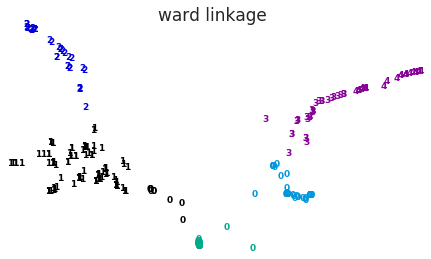

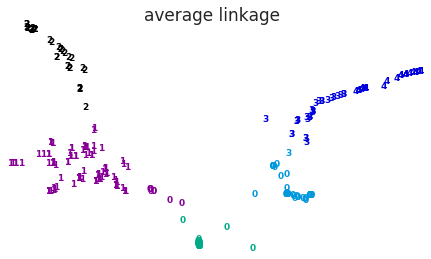

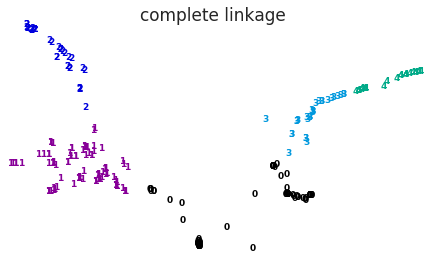

In [141]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#----------------------------------------------------------------------

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()


In [145]:
def hierarchical_Clustering_Dendrogram (X, method, metric, xlabel):
  linkage_matrix = linkage(X, method, metric)
  figure = plt.figure(figsize=(7.5, 5))
  dendrogram(
      linkage_matrix,
      color_threshold=0,
      leaf_rotation=90.,  # rotates the x axis labels
      leaf_font_size=8.,
      truncate_mode='lastp', #show only the last p merged clusters
  )
  plt.title('Hierarchical Clustering Dendrogram '+method)
  plt.xlabel(xlabel)
  plt.ylabel('distance')
  plt.tight_layout()
  plt.show()

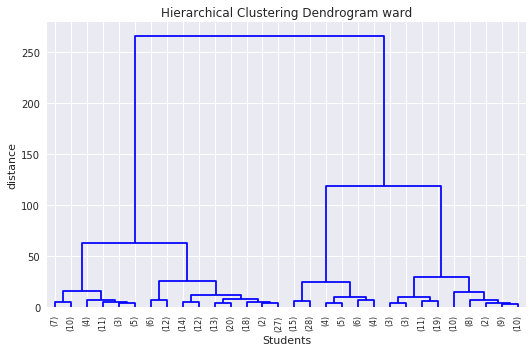

In [146]:
hierarchical_Clustering_Dendrogram(X, 'ward', 'euclidean', 'Students')

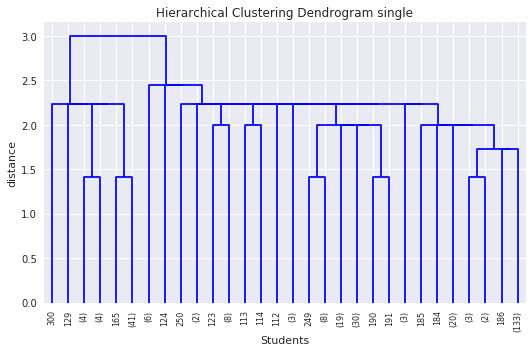

In [147]:
hierarchical_Clustering_Dendrogram(X, 'single', 'euclidean', 'Students')

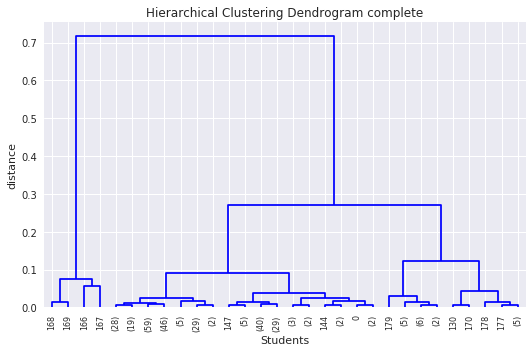

In [148]:
hierarchical_Clustering_Dendrogram(X, 'complete', 'cosine', 'Students')

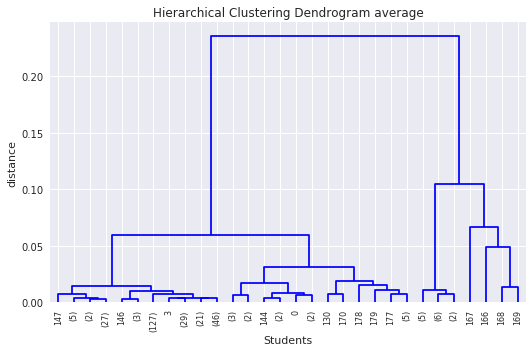

In [149]:
hierarchical_Clustering_Dendrogram(X, 'average', 'cosine', 'Students')

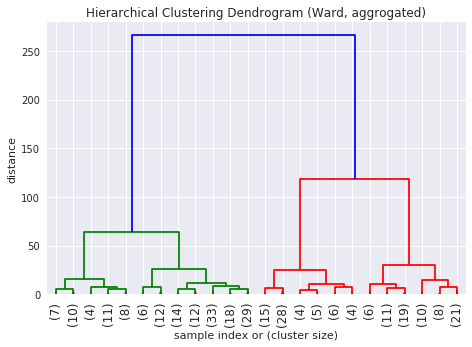

In [150]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()